# метрика

**Реальное разбиение** - разбиение, полученное путем разбиения точек на классы руками эксперта.

**Полученное разбиение** - разбиение точек на классы, полученное одним из алгоритмов.

Для каждого кластера из **полученного разбиения** мы находим кластер из **реального разбиения**, для которого количество точек в пересеченнии максимально. Значение метрики - сумма количества этих точек, разделенная на общее количество точек в мозге.


>$C - реальное\spaceразбиение$

>$C' - полученное\spaceразбиение$

>$metric(C') = \frac{\sum_{i=1}^{m}\max_{j=1,n}(C'_{i}\cap C_{j})}{\sum_{i=1}^{n}|C_{i}|}; |C| = n; C = \bigcup\limits_{i=1}^{n} C_{i};|C'| = m;C' = \bigcup\limits_{i=1}^{m} C'_{i}$

In [36]:
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
brain = pd.read_csv('zonetab-mel-animal-2.csv')

left_hemisphere = brain[brain.h == 'l']

ides = left_hemisphere.id.values + 1
target = left_hemisphere.zone.values

left_hemisphere = left_hemisphere.iloc[:, [1, 2, 3]].to_numpy()

In [38]:
def draw(data, labels):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:, 0], 
               data[:, 1], 
               data[:, 2], 
               c=labels)
    plt.show()

In [39]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=20, 
                random_state=21, 
                init='k-means++').fit(left_hemisphere)

In [40]:
from sklearn.cluster import AgglomerativeClustering

aglomerative_model = AgglomerativeClustering(n_clusters=20, linkage='ward').fit(left_hemisphere)

In [41]:
from sklearn.cluster import Birch

birch_model = Birch(n_clusters=20).fit(left_hemisphere)

<IPython.core.display.Javascript object>


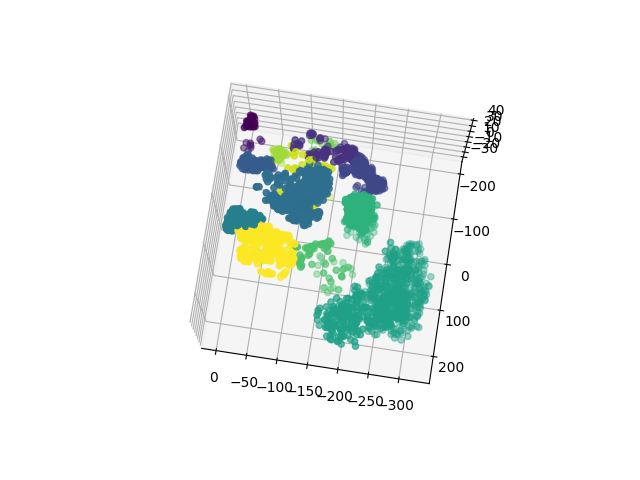

In [42]:
draw(left_hemisphere, target)

# kmeans score - 0.917347

<IPython.core.display.Javascript object>


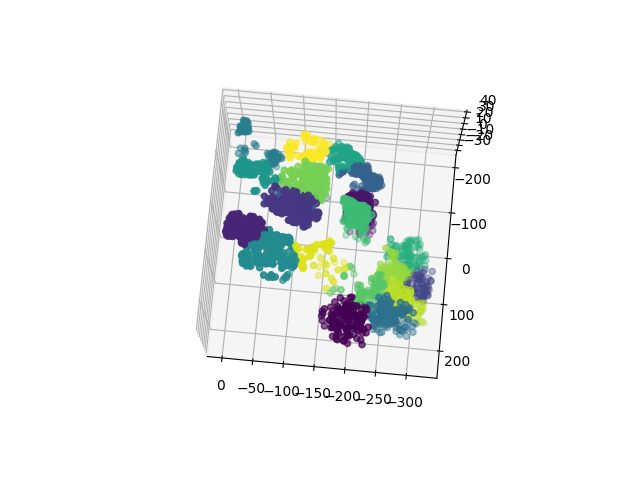

In [43]:
draw(left_hemisphere, kmeans_model.labels_)

# hierarchical algorithm score - 0.914626

<IPython.core.display.Javascript object>


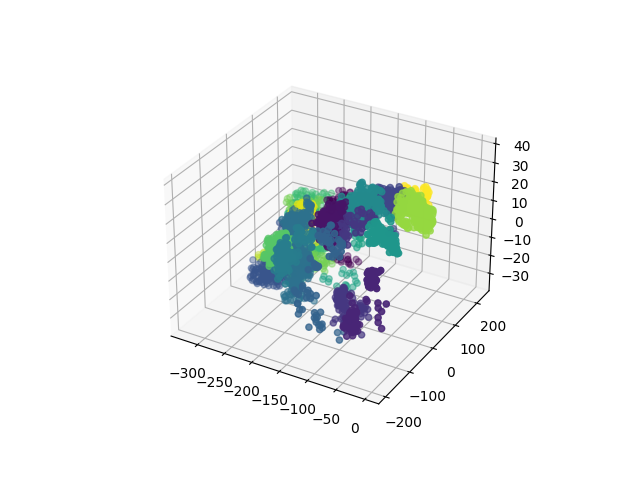

In [9]:
draw(left_hemisphere, aglomerative_model.labels_)

# birch score - 0.914626

<IPython.core.display.Javascript object>


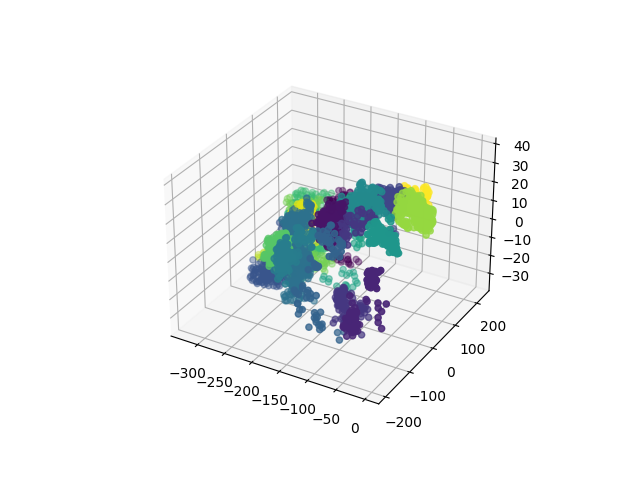

In [10]:
draw(left_hemisphere, birch_model.labels_)

In [34]:

def get_cluster_column(path_to_file):
    cluster_column = []
    cluster_id = 1

    with open(path_to_file, 'r') as file:
        file.readline()

        for line in file.readlines():

            for vertex_id in line.split():
                cluster_column.append((int(vertex_id), cluster_id))

            cluster_id += 1

    cluster_column.sort(key=lambda item: item[0])

    return [row[1] for row in cluster_column]


def draw(data, path_to_cluster_column):
    cluster_column = get_cluster_column(path_to_cluster_column)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[data.h == 'l']['x'],
               data[data.h == 'l']['y'],
               data[data.h == 'l']['z'],
               c=cluster_column)
    ax.set_title(' '.join(path_to_cluster_column.split('.')[0].split('_')[1:]))
    plt.show()

<IPython.core.display.Javascript object>


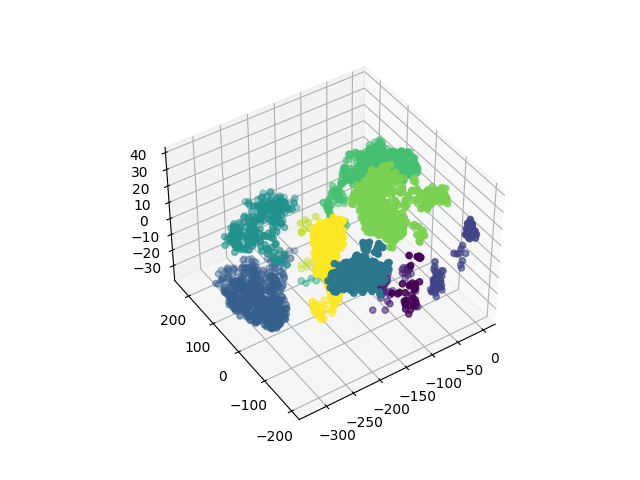

In [35]:
%matplotlib notebook
draw(pd.read_csv('zonetab-mel-animal-2.csv'), 'mel-2-louvain.out')

# louvain score - 0.82449